In [4]:
mport pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math
import copy

In [5]:
import sys
sys.path.append("C:/Users/ander/Documents/Handling/Kurs/Python/Eget/Bib/datagnome")
import datagnome as dgnom
from importlib import reload

In [3]:
# Reload already imported module
reload(dgnom)

<module 'datagnome' from 'C:\\Users/ander/Documents/Handling/Kurs/Python/Eget/Bib/datagnome\\datagnome.py'>

In [ ]:
# Increase image quality (if needed)
plt.rcParams["figure.dpi"] = 300

# Workflow

- Data import
- Unsupervised learning
    - Data Preparations
        - X & y
    - Select no of principal components (if PCA)
    - Select number of clusters
    - Train model
- Supervised learning
    - Data Preparations
        - X & y
        - Train test split
    - Train & eval different models
        - Choose best model(s)
    - Hyperparameter tuning for best model(s)
        - Proceed with best model
    - Predictions on test data, final test against benchmark
- Save model

# Data import

In [23]:
path = "data/churn_train.csv"
path = "data/cancer_clf.csv"

df = pd.read_csv(path)

In [ ]:
# Alt
urls = lambda i: f"data/carsales/{i}"
dfc = pd.read_csv(urls("norway_new_car_sales_by_model.csv"),encoding = "ansi")
dfm = pd.read_csv(urls("norway_new_car_sales_by_make.csv"),encoding = "ansi")

In [47]:
from sklearn.datasets import load_digits

In [61]:
digits = load_digits()

In [4]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [9]:
#print(sns.get_dataset_names())
df = sns.load_dataset("penguins")
#df = sns.load_dataset("dots")
#df = sns.load_dataset("titanic")
#df = sns.load_dataset("iris")
#df = sns.load_dataset("mpg")

In [12]:
def agetocat(x):
    if x == np.nan:
        return "unknown"
    elif x < 15:
        return "child"
    else:
        return "adult"
    
# Applies function to series
df["agecat"] = df.age.apply(agetocat)

In [ ]:
df.drop(columns = "deck",inplace=True) # Remove columns (implicit)
df.drop(columns = "age",inplace=True) # Remove columns (implicit)
df.drop(columns = "sex",inplace=True) # Remove columns (implicit)
df.drop(columns = "adult_male",inplace=True) # Remove columns (implicit)
#df.drop(columns = "adult_male",inplace=True) # Remove columns (implicit)
df.drop(columns = "alive",inplace=True) # Remove columns (implicit)
#df.col_2.fillna(df.col_2.mean()) # Mean value of column

In [10]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

# Unsupervised learning

In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [10]:
def df_sknpip(X,ncl,npca=False):
    scaler = StandardScaler()
    model = KMeans(n_clusters=ncl)
    if npca:
        decomp = PCA(n_components=npca)
        pipe = make_pipeline(scaler,decomp,model)
    else:
        pipe = make_pipeline(scaler, model)
    pipe.fit(X)
    
    if npca:
        print(pipe['pca'].explained_variance_ratio_.cumsum())
    return pipe

In [11]:
def df_checknclust(X,npca=False):
    scaler = StandardScaler()
    model = KMeans()
    viz = KElbowVisualizer(model)
    if npca:
        decomp = PCA(n_components=npca)
        pipe = make_pipeline(scaler,decomp, viz)  
        pipe.fit(X)
        pipe[2].show()
    else:
        pipe = make_pipeline(scaler, viz)
        pipe.fit(X)
        pipe[1].show()    

In [12]:
def amplt(df,var_list,xvar,kolm = 3):
    """Plot categorys"""
    rows = math.ceil(len(var_list)/kolm)
    fig, axs = plt.subplots(rows, kolm, figsize=(20,5*rows))

    for i, ax in zip(var_list,axs.flat):
        g = sns.barplot(data=df,x=xvar,y=i,ax=ax)
        ax.set(xlabel="",ylabel="",title=i)
        
    for i in axs.flat[::-1][:rows*3-len(var_list)]:
        i.set_axis_off()
    plt.show()

## Data preparations

In [35]:
X = df.select_dtypes("number").copy()
X.dropna(inplace=True)
#X.isna().sum()

## Pipeline

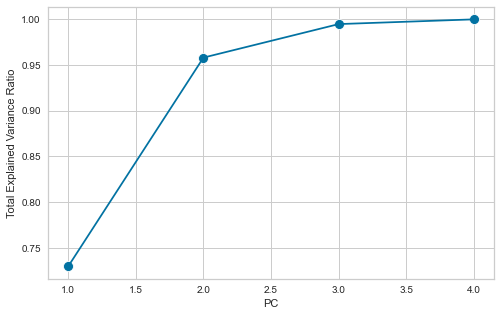

In [17]:
# Step 1: determine number of components (skip if not PCA)
scaler = StandardScaler()
decomp = PCA()
pipe = make_pipeline(scaler,decomp)
pipe.fit(X)

expl_vari = pipe['pca'].explained_variance_ratio_.cumsum()
index = [i+1 for i in range(len(expl_vari))]

plt.figure(figsize=(8,5))
sns.lineplot(x=index, y=expl_vari)
sns.scatterplot(x=index, y=expl_vari, s=100)
plt.ylabel('Total Explained Variance Ratio')
plt.xlabel('PC')
plt.show()

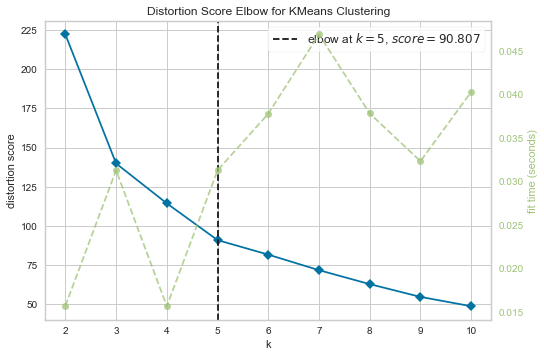

In [19]:
# Step 2: determine number of clusters
df_checknclust(X,npca=False)
#df_checknclust(X,npca=3)

In [60]:
# Step 3: Train model 
pipe = df_sknpip(X,ncl=5,npca=3)

[0.72962445 0.95813207 0.99482129]


In [61]:
# Step 4: Add information to dataframe
df['cluster'] = pipe['kmeans'].labels_

In [63]:
# If PCA
values = pipe[:2].transform(X)
labels = [f"PC{i+1}" for i,v in enumerate(values.T)]
df = df.join(pd.DataFrame(values,columns=labels))

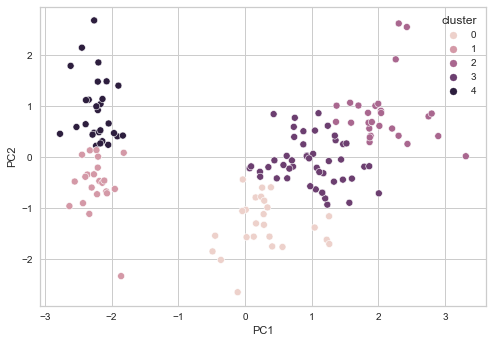

In [76]:
sns.scatterplot(data=df,x="PC1",y="PC2",hue="cluster")
plt.show()

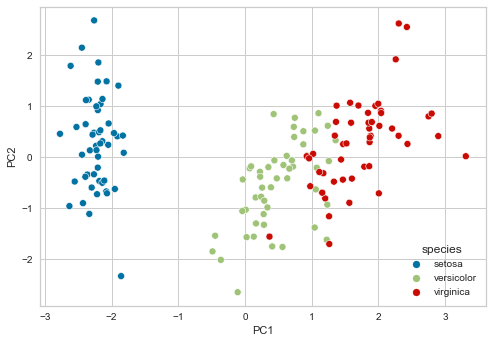

In [72]:
sns.scatterplot(data=df,x="PC1",y="PC2",hue="species")
plt.show()

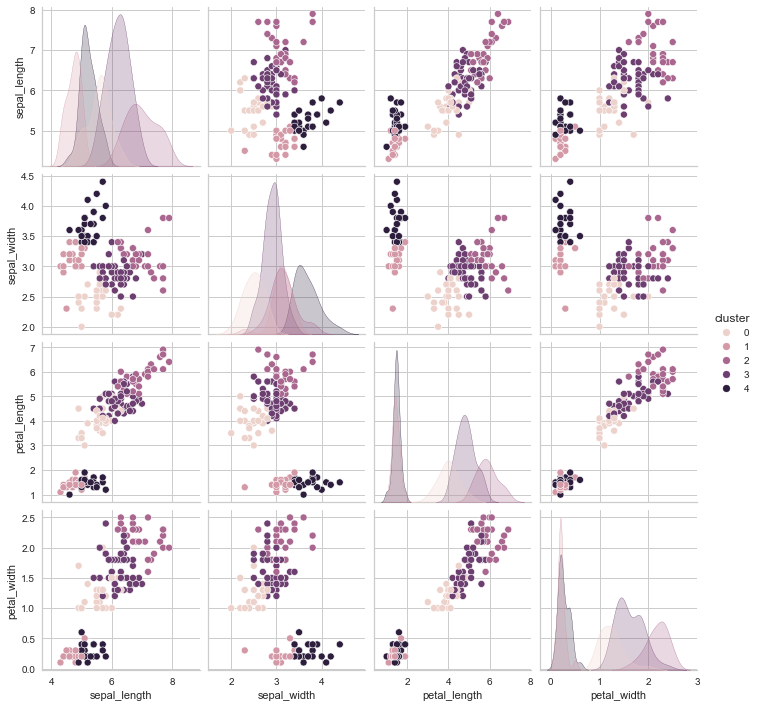

In [69]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster']
sns.pairplot(df[cols],hue="cluster")
plt.show()

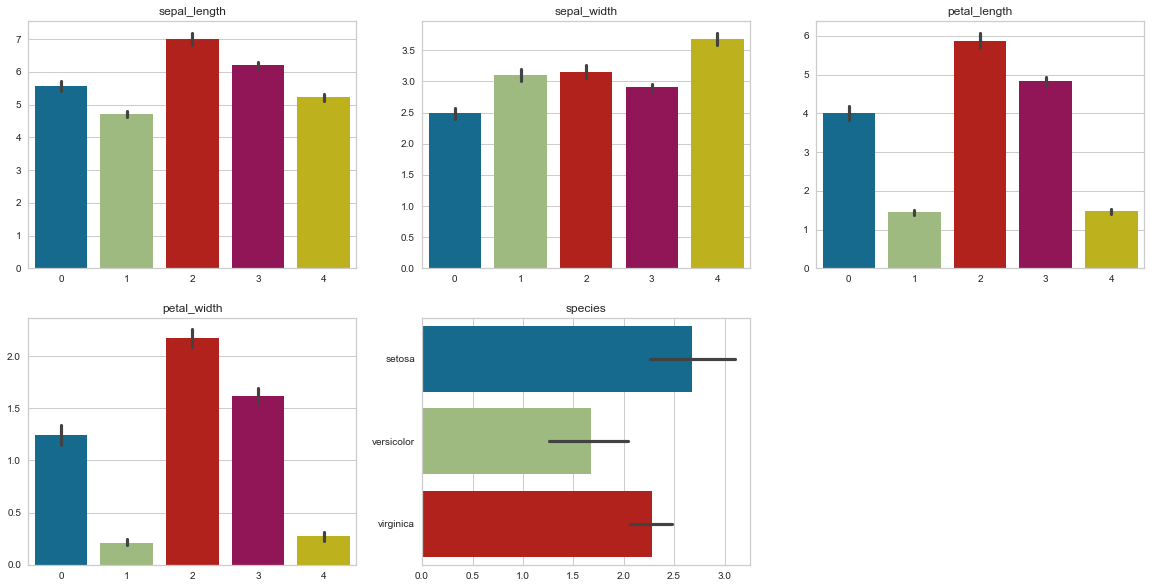

In [83]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
xvar = "cluster"
amplt(df,cols,xvar,kolm = 3)
#dgnom.df_cobahiscplots(df,cols,kolm=4,ch=4,pw=16,pltyp="barplot",target="cluster",hue=None,logs=False,kde=False,est=False,stat="count")

# Supervised learning

In [28]:
from sklearn.feature_selection import SelectKBest, chi2, RFE
#from sklearn.linear_model import LogisticRegression, Ridge

## Data preparations
### X & y

In [11]:
# Titanic dataset
target = "survived"

X = df.drop(target,axis=1)
y = df[target]

In [11]:
# penguins dataset
target = "species"

X = df.drop(target,axis=1)
y = df[target]

In [62]:
# mpg datasaet
target = "mpg"

X = df[["displacement","horsepower","weight","acceleration","model_year"]]
y = df[target]

In [62]:
X = digits.data
y = digits.target

### Balancing data

Only If beneficial to model performance!

In [ ]:
df[target].value_counts(normalize=True)
#dfb = dgnom.df_downsample(df,target) # Downsampling

### Train test split, non-cyclic data

In [12]:
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_TEST,y_train,y_TEST = train_test_split(X,y,test_size=0.2,random_state=42)
#dft = X_train.join(y_train)

### Train test split, Cyclic data

Typically data with datetime indexing. Cyclic data need to be split such that both test and training set are continuous.

In [ ]:
# Alternative 1: split on length
X_train,X_TEST,y_train,y_TEST = dgnom.ttt_split_length(X,y,test_size=0.25)
dft = X_train.join(y_train)

In [ ]:
# Alternative 2: split on datetime
#start_t = pd.to_datetime("2002-04", format='%Y-%m')
start_t = pd.to_datetime("2002-04-01 00:00:00", infer_datetime_format=True)

X_train,X_TEST,y_train,y_TEST = dgnom.ttt_split_dtime(X,y,test_start=start_t,dtcol="")
dft = X_train.join(y_train)

## Feature selection - filter methods
### Introduction

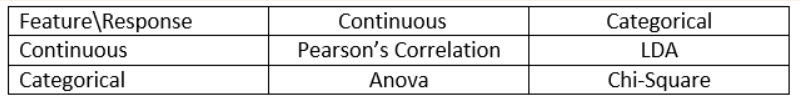

Correlation coefficients for different types of data. Image Source: Analytics Vidhya


- Pearson’s Correlation: It is used as a measure for quantifying linear dependence between two continuous variables X and Y. Its value varies from -1 to +1.
- LDA: Linear discriminant analysis is used to find a linear combination of features that characterizes or separates two or more classes (or levels) of a categorical variable.
- ANOVA: ANOVA stands for Analysis of variance. It is similar to LDA except for the fact that it is operated using one or more categorical independent features and one continuous dependent feature. It provides a statistical test of whether the means of several groups are equal or not.
- Chi-Square: It is a is a statistical test applied to the groups of categorical features to evaluate the likelihood of correlation or association between them using their frequency distribution.

One thing that should be kept in mind is that filter methods do not remove multicollinearity. So, you must deal with multicollinearity of features as well before training models for your data.

__Correlation__: Measures the strength and direction between two columns in your dataset, often used to find the relationship between a feature and the target.

__Collinearity__: A case where two features are linearly associated (high correlation), and they are used as predictors for the target.

__Multicollinearity__: A special case of collinearity where a feature exhibits a linear relationship with two or more features.

__Variance Inflation Factor__: VIF allows you to determine the strength of the correlation between the various independent variables. Simply put VIF tries to predict each feature from the other features in the dataset in a series of multiple regression analyses. If a regression show a large R2 (good prediction) the target feature exhibits multicollinearity with the other features.

### Workflow

1. Check correlation between featur and target (correlation plot and pairplot)
1. Check collinearity between features (correlation plot and pairplot)
1. Check Multicollinearity between features with VIF
1. Barplot with target as x-axis
1. Additional methods for identifying important features (e.g. sklearn.feature_selection.SelectKBest)

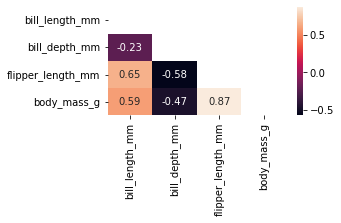

In [14]:
# Correlation matrix, numerical columns only
target = "target_var"
target = False
dgnom.df_corrbas(df,col=target,method="pearson")

interval columns not set, guessing: ['survived', 'pclass', 'sibsp', 'parch', 'fare']


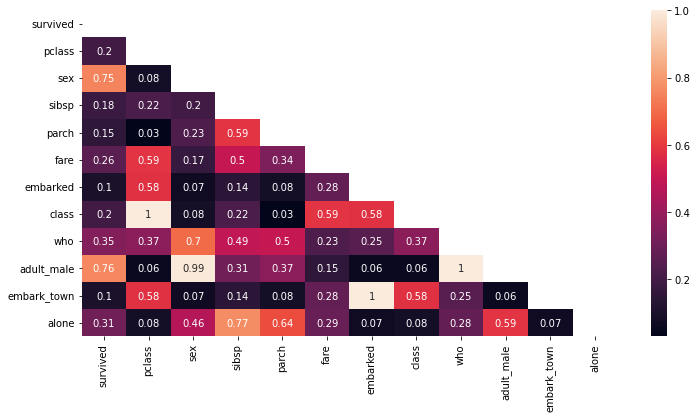

In [16]:
# Correlation matrix, numerical and non-numerical columns
target = "target_var"
target = False
dgnom.df_corrphik(df,col=target)

In [47]:
df.columns

Index(['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked',
       'class', 'who', 'embark_town', 'alone', 'agecat'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     889 non-null    int64   
 1   pclass       889 non-null    int64   
 2   sex          889 non-null    object  
 3   sibsp        889 non-null    int64   
 4   parch        889 non-null    int64   
 5   fare         889 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        889 non-null    category
 8   who          889 non-null    object  
 9   embark_town  889 non-null    object  
 10  alone        889 non-null    bool    
 11  agecat       889 non-null    object  
dtypes: bool(1), category(1), float64(1), int64(4), object(5)
memory usage: 71.4+ KB


In [48]:
cols = False
cols = ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'] # mpg dataset
cols = ['survived', 'pclass', 'sibsp', 'parch', 'fare'] # Titanic dataset

dgnom.df_calc_vif(df,features=cols)

Guide to interpreting VIF values:
VIF = 1: Features are not correlated
1 < VIF < 5: Features are moderately correlated
VIF > 5: Features are highly correlated
VIF > 10: High correlation between features and is cause for concern


,VIF
fare,1.589566
parch,1.264303
pclass,1.597918
sibsp,1.249794
survived,1.146678


In [49]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression,mutual_info_regression

In [53]:
X_in = X_train.select_dtypes(exclude=["bool","object","category"])

In [55]:
# UNIVARIATE feature selection with sklearn

n = 3              # Number of features
classif = True    # True if classification task

X_in = X_train.select_dtypes(exclude=["bool","object","category"])
y_in = y_train.to_frame()
skb = SelectKBest(chi2 if classif else mutual_info_regression, k=n).fit(X_in, y_in)

print("\n ---Feature selection for classification---")
print(f"Best {n} features according to SelectKBest|chi2:\n {X_in.columns[skb.get_support()]}")


 ---Feature selection for classification---
Best 3 features according to SelectKBest|chi2:
 Index(['pclass', 'sibsp', 'fare'], dtype='object')


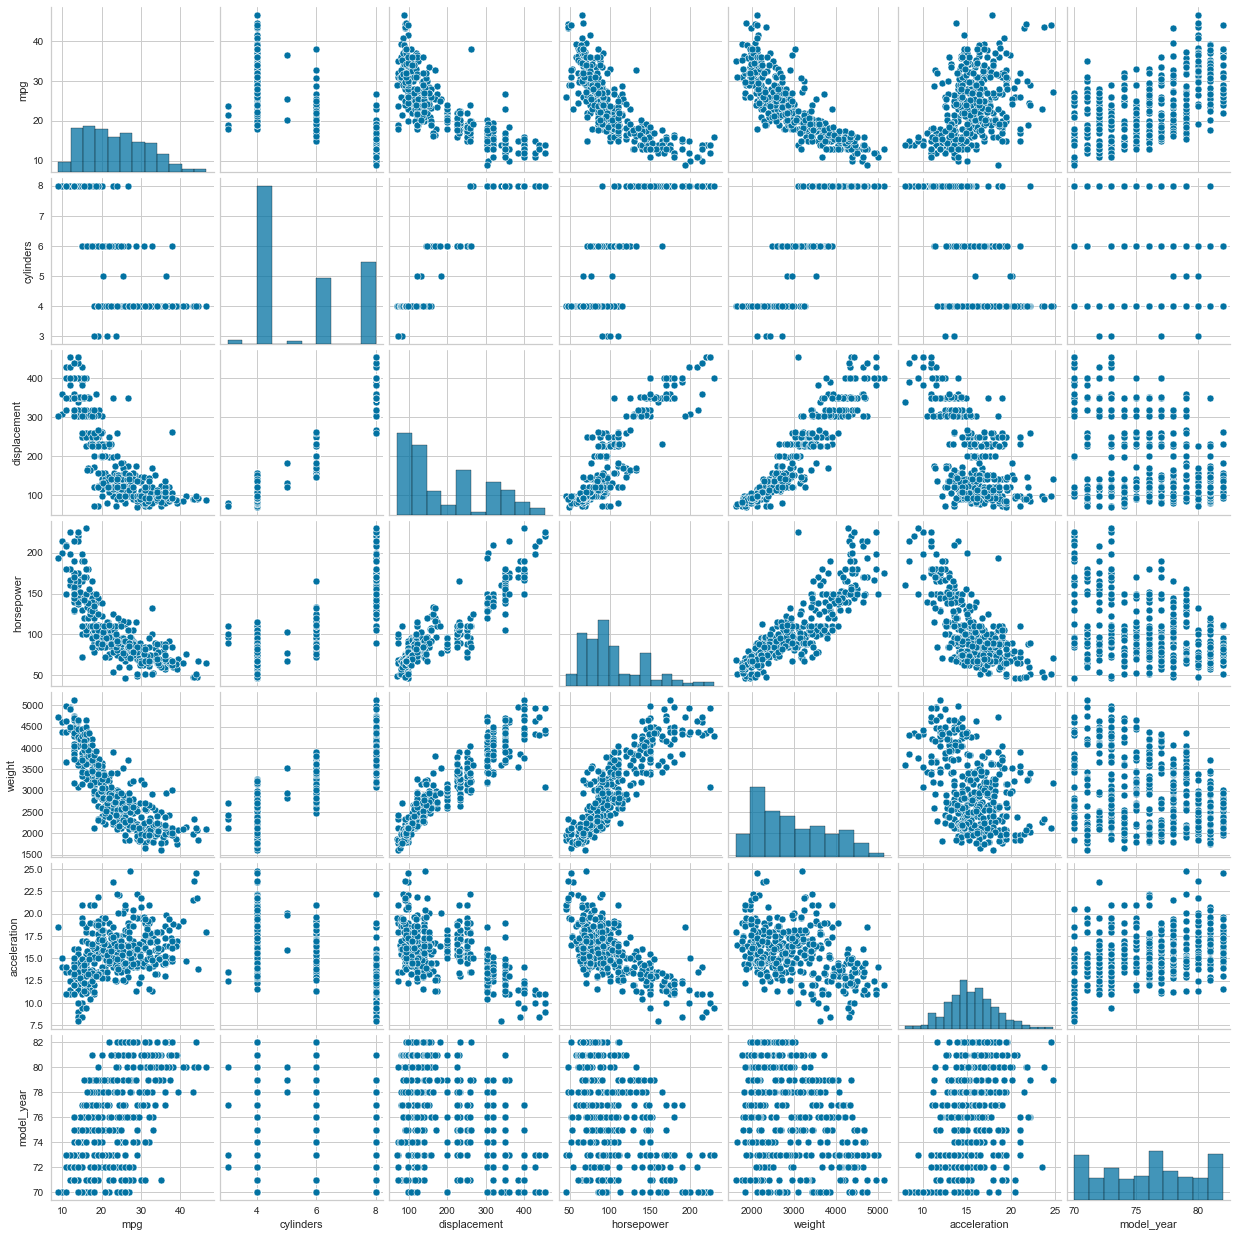

In [35]:
cols = df.select_dtypes(exclude=["bool","object","category"]).columns
sns.pairplot(df[cols],hue=None)
plt.show()

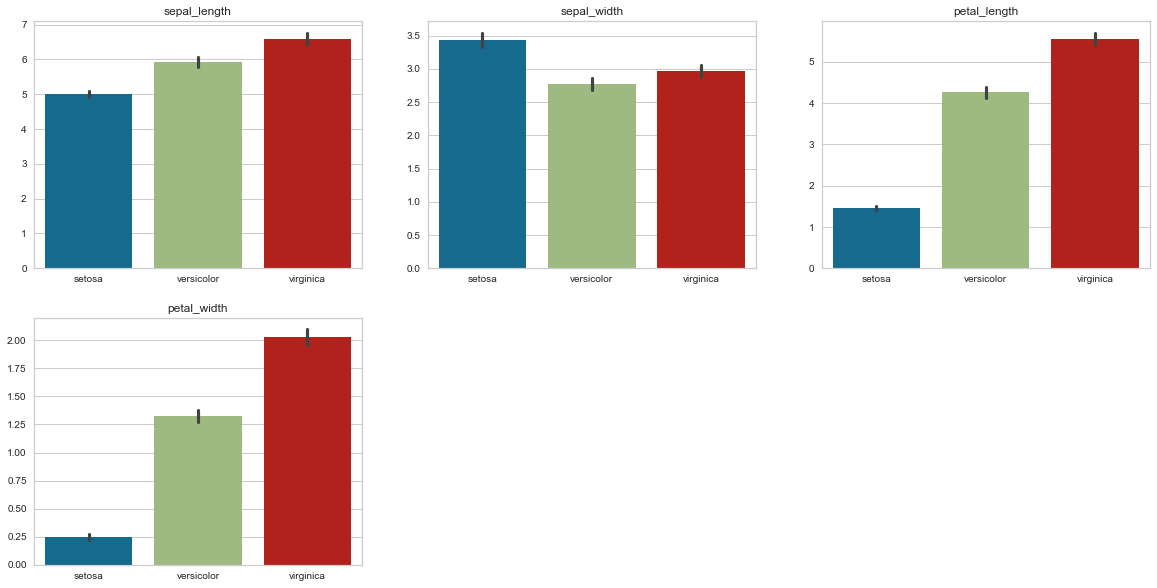

In [20]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
xvar = "species"
amplt(df,cols,xvar,kolm = 3)

## Classification model

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import make_pipeline

from sklearn.metrics import f1_score,precision_score,recall_score, accuracy_score
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import make_scorer

from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [19]:
#!pip install mlxtend

In [20]:
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.math import num_combinations

### Workflow

1. Choice of Performance Metric
    - Accuracy = True predictions / All predictions
    - Precision = TP / (TP + FP) → Hit Ratio when making a positive prediction
    - Recall / Sensitivity = TP / (TP + FN) → Ability to capture all members of
positive group
    - Specificity = TN / (TN + FP) → Ability to capture all members of negative
group
    - F1-score = 2* (Recall + Precision) / (Recall + Precision) → Performance metric
especially useful for imbalanced classes
    - AUC / ROC curve = Used to evaluate performance at various threshold
settings
    - Custom metric
1. Choice of scalers:
    - StandardScaler: Industry standard
    - RobustScaler: For data with outliers
    - MinMaxScaler: Good choice for features that are not standard distributet and do not contain outliers
    - https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02
1. Feature selection
1. Model selection
    - https://scikit-learn.org/stable/supervised_learning.html
1. Hyperparameter tuning
1. Refit best model on all training data
1. Evaluate model performance on training data
1. Evaluate model performance on test data
1. Refit best model on all data
1. Update datafram

### Prepare pipeline

In [21]:
# Example of custom metric
def hesf(y_true, y_pred):
    tp = 5*len([t for t,p in zip(y_true, y_pred) if (t==p and t==1)])
    tn = 0*len([t for t,p in zip(y_true, y_pred) if (t==p and t==0)])
    fp = -5000*len([t for t,p in zip(y_true, y_pred) if (t!=p and t==1)])
    fn = 0*len([t for t,p in zip(y_true, y_pred) if (t!=p and t==0)])
    p = 5*len([t for t in y_true if t==1])
    n = 0*len([t for t in y_true if t==0])
    
    return (tp+tn+fp+fn)/(p+n)
score = make_scorer(hesf, greater_is_better=True)

In [108]:
def pipe_egen(models,preprop,Xin,yin,scor,p_param=False,cv=5,sfs=False,sfsdir="forward"):
    """Create pipeline
    
    Parameters
    ---------
    classifiers:  List of models to evaluate  
    preprop:      Preprocessing pipeline
    p_grid:       List of Dicts - one for each model - with hyperparameters values to evaluate  
    Xin:          X
    yin:          y
    scor:         Scoring function, if classification: {accuracy | f1 | precision | recall | roc_auc | ...}
                                    if regression: {r2 | explained_variance | ...}
    cv:           Number of folds used for cross validation, default 5
    sfs:          Use SequentialFeatureSelector from skleanr for feature selection {True | False}, default False
    sfsdir:       Direction of SequentialFeatureSelector {"forward" | "backward"}, default "forward"
    """
    trainedm = []
    hyparam = p_param if p_param else [{} for i in range(len(classifiers))]
    
    for m,pg in zip(models,hyparam):
        if sfs:
            mc = copy.deepcopy(m)
            sfsm = SequentialFeatureSelector(mc,n_features_to_select=None,direction=sfsdir,
                                            scoring=scor,cv=cv)
            pipe = make_pipeline(preprop,sfsm,m)
        else:
            pipe = make_pipeline(preprop,m)
        
        if p_param:
            grid = GridSearchCV(pipe,param_grid=pg,scoring=scor)
            grid.fit(Xin,yin)
            trainedm.append(grid)
            print(f"Score for {m} is: {grid.best_score_} (with hyperparams: {grid.best_params_})") 
        else:
            cv_score = cross_val_score(pipe,X_train,y_train,cv=cv,scoring=scor)
            pipe.fit(Xin,yin)
            trainedm.append(pipe)
            print(f"Average cross fold score for {m} is: {cv_score.mean()}")
        if sfs:
            namnut = pipe[0].transformers_[0][2] + list(pipe[0].transformers_[1][1][1].get_feature_names_out(cat_features))
            valdnamn = pipe[1].get_feature_names_out(namnut) 
            valdnamn = pipe[1].get_feature_names_out(namnut)
            print(f"Selected features for {m}: {valdnamn}")   
    return trainedm

In [ ]:
def plot_mlxl_gs(sfs,model_name,xaxfull=True,fsize=(6,4)):
    metric_dict = sfs.get_metric_dict()
    k_feat = sorted(metric_dict.keys())
    avg = [metric_dict[k]['avg_score'] for k in k_feat]
    upper, lower = [], []
    
    for k in k_feat:
        upper.append(metric_dict[k]['avg_score'] + metric_dict[k]['std_dev'])
        lower.append(metric_dict[k]['avg_score'] - metric_dict[k]['std_dev'])

    fig = plt.figure(figsize=fsize)
    plt.fill_between(k_feat,upper,lower,alpha=0.15,color='blue',lw=1)
    plt.plot(k_feat, avg, color='blue', marker='o')
    plt.title(f"{model_name}".capitalize(),fontsize = 12)
    plt.ylabel("Performance +/- standard Deviation",fontsize = 10)
    plt.xlabel("Number of Features",fontsize = 10)
    plt.grid()
    
    if xaxfull:
        plt.xticks(k_feat, [str(metric_dict[k]['feature_idx']) for k in k_feat], rotation=90)
    else:
        plt.xticks(k_feat, [str(len(metric_dict[k]['feature_idx'])) for k in k_feat])
    plt.show()

In [67]:
def fs_sfs_mlxl(Xin,yin,models,preprop,fstype="sfs",scor="accuracy",cv=5,xaxfull=False,k_feat="best",forw=True,flt=False,max_feat=2):
    
    for m in models:
        if fstype == "efs":
            xaxfull = True
            fsize = (20,14)
            tl = "Exhaustive Feature Selector"
            fs = EFS(m, min_features = 1, max_features = max_feat, scoring=scor, print_progress = True, cv = cv)
        else:
            fsize = (6,4)
            tl = "Sequential Forward Selection (w. StdErr)"
            fs = SFS(m, k_features = k_feat, forward = forw, floating = flt, scoring = scor, cv = cv)
        
        pipe = make_pipeline(preprop,fs)
        pipe.fit(Xin, yin)
        
        # Plot results
        # ALT: plot_sfs from mlxtend
        plot_mlxl_gs(pipe[1],tl,xaxfull=xaxfull,fsize=fsize)
        namnut = pipe[0].transformers_[0][2] + list(pipe[0].transformers_[1][1][1].get_feature_names_out(cat_features))
        
        if fstype == "efs":
            print(f"Best features for {m}: {[namnut[i] for i in pipe[1].best_idx_]}")
        else:
            print(f"Best features for {m}: {[namnut[i] for i in pipe[1].k_feature_idx_]}")
        print("---------")
        
    print(f"Name and number for all features:")
    print({i:namnut[i] for i in range(len(namnut))})

In [23]:
tamedcol = X_train.columns.to_list()

num_features = X_train.loc[:,tamedcol].select_dtypes("number").columns.to_list()
cat_features = X_train.loc[:,tamedcol].select_dtypes(exclude="number").columns.to_list()

In [36]:
# Scoring metric
# if classification: {accuracy | f1 | precision | recall | roc_auc | ...}
# if regression: {r2 | explained_variance | ...}
scormetrc = "accuracy" #

scaler = StandardScaler()
#scaler = RobustScaler()
#scaler = MinMaxScaler()

num_trans = make_pipeline(SimpleImputer(strategy="median"),scaler)
cat_trans = make_pipeline(SimpleImputer(strategy = "constant",fill_value="missing"),
                         OneHotEncoder(drop="if_binary"))

preprop = make_column_transformer(
    (num_trans,num_features),
    (cat_trans,cat_features)
    )

classifiers = [LogisticRegression(max_iter=1000),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(),
               KNeighborsClassifier(),
               GaussianNB()]
# Pipe parameters
# Dafault hyperparameter values cab be found in the description of each model:
# https://scikit-learn.org/stable/supervised_learning.html
p_grid = [{"logisticregression__C":[0.1,1,10,100]},
          {"decisiontreeclassifier__max_depth":[None,20,50],
           "decisiontreeclassifier__min_samples_leaf":[1,2,4]},
          {"randomforestclassifier__n_estimators":[100,200,75],
           "randomforestclassifier__max_depth":[None,20,50],
           "randomforestclassifier__min_samples_leaf":[1,2,4]},
          {"svc__C": [0.1,1,10,100,1000],
           "svc__gamma": [1,0.5,0.1,0.05,0.01]},
          {"kneighborsclassifier__n_neighbors": [3,5,11,15,19],
           "kneighborsclassifier__metric": ["euclidean","manhattan"]},
          {}
         ]

### Feature selection

In [61]:
# Calculate number of possible feature combinations
# Use ExhaustiveFeatureSearch if number of combinations is reasonable small
all_comb = np.sum([num_combinations(n=X.shape[1],k=i) for i in range(1,X.shape[1]+1)])
all_comb

# Perform Exhaustive Feature Selector from mlxtend
#fs_sfs_mlxl(X_train,y_train,classifiers[0:2],preprop,fstype="efs",scor="accuracy",cv=5,xaxfull=False,k_feat="best",forw=True,flt=False,max_feat=3)

63

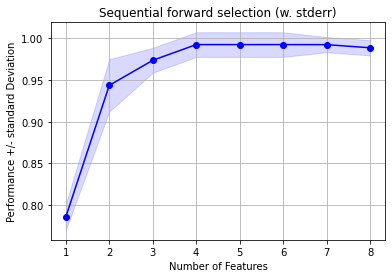

Best features for LogisticRegression(max_iter=1000): ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'island_Dream']
---------


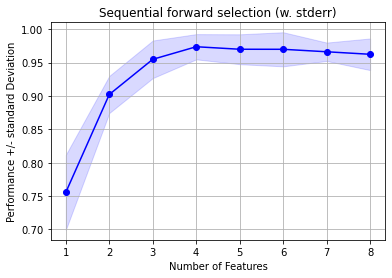

Best features for DecisionTreeClassifier(): ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'island_Dream']
---------
Name and number for all features:
{0: 'bill_length_mm', 1: 'bill_depth_mm', 2: 'flipper_length_mm', 3: 'body_mass_g', 4: 'island_Biscoe', 5: 'island_Dream', 6: 'island_Torgersen', 7: 'sex_Male'}


In [66]:
# Perform feature selection with SequentialFeatureSelector from mlxtend
fs_sfs_mlxl(X_train,y_train,classifiers[0:2],preprop,fstype="sfs",scor="accuracy",cv=5,xaxfull=False,k_feat="best",forw=True,flt=False,max_feat=3)

In [77]:
tamedcol = ['island', 'bill_length_mm', 'bill_depth_mm','flipper_length_mm']
tamedcol = X_train.columns.to_list()

num_features = X_train.loc[:,tamedcol].select_dtypes("number").columns.to_list()
cat_features = X_train.loc[:,tamedcol].select_dtypes(exclude="number").columns.to_list()

preprop = make_column_transformer(
    (num_trans,num_features),
    (cat_trans,cat_features)
    )

### Model selection

In [110]:
# Check best model, without automatic feature selection
trmod1 = pipe_egen(classifiers,preprop,X_train,y_train,scor=scormetrc,p_param=False,cv=5,sfs=False,sfsdir="forward")

Average cross fold score for LogisticRegression(max_iter=1000) is: 0.9887491264849755
Average cross fold score for DecisionTreeClassifier() is: 0.9662473794549266
Average cross fold score for RandomForestClassifier() is: 0.9812718378756115
Average cross fold score for SVC() is: 0.9887491264849755
Average cross fold score for KNeighborsClassifier() is: 0.9887491264849755
Average cross fold score for GaussianNB() is: 0.7067085953878406


In [107]:
# Check best model, with automatic feature selection
trmod1 = pipe_egen(classifiers,preprop,X_train,y_train,scor=scormetrc,p_param=False,cv=5,sfs=True,sfsdir="forward")

Average cross fold score for LogisticRegression(max_iter=1000) is: 0.9925925925925926
Selected features for LogisticRegression(max_iter=1000): ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'island_Dream']
Average cross fold score for DecisionTreeClassifier() is: 0.970020964360587
Selected features for DecisionTreeClassifier(): ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'sex_Male']
Average cross fold score for RandomForestClassifier() is: 0.9737945492662472
Selected features for RandomForestClassifier(): ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'island_Dream']
Average cross fold score for SVC() is: 0.9812718378756113
Selected features for SVC(): ['bill_length_mm' 'bill_depth_mm' 'flipper_length_mm' 'island_Dream']
Average cross fold score for KNeighborsClassifier() is: 0.9887491264849755
Selected features for KNeighborsClassifier(): ['bill_length_mm' 'bill_depth_mm' 'body_mass_g' 'island_Dream']
Average cross fold score for GaussianNB() is: 0.966107617051

### Hyperparameter Tuning

In [109]:
#trmod2 = pipe_egen(classifiers[:-1],preprop,X_train,y_train,scor=scormetrc,p_grid=p_grid[:-1],cv=5)
trmod2 = pipe_egen(classifiers,preprop,X_train,y_train,scor=scormetrc,p_param=p_grid,cv=5,sfs=False,sfsdir="forward")

Score for LogisticRegression(max_iter=1000) is: 0.9962264150943396 (with hyperparams: {'logisticregression__C': 10})
Score for DecisionTreeClassifier() is: 0.9699510831586304 (with hyperparams: {'decisiontreeclassifier__max_depth': 50, 'decisiontreeclassifier__min_samples_leaf': 1})
Score for RandomForestClassifier() is: 0.992522711390636 (with hyperparams: {'randomforestclassifier__max_depth': 50, 'randomforestclassifier__min_samples_leaf': 4, 'randomforestclassifier__n_estimators': 75})
Score for SVC() is: 0.9962264150943396 (with hyperparams: {'svc__C': 10, 'svc__gamma': 0.1})
Score for KNeighborsClassifier() is: 0.9962264150943396 (with hyperparams: {'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3})
Score for GaussianNB() is: 0.7067085953878406 (with hyperparams: {})


### Retrain best model on all data

In [113]:
model = trmod2[0].best_estimator_
model.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
           

### Evaluate model performance on training data

In [116]:
y_pred = model.predict(X_train)

train_score = accuracy_score(y_train,y_pred)
train_score = precision_score(y_train,y_pred)
train_score = recall_score(y_train,y_pred)
train_score = f1_score(y_train,y_pred)
train_score = model.score(X_train,y_train) # Scoring by accuracy

print("Train score: ",train_score)

Train score:  1.0


In [ ]:
def conf_matrix_helper(model,x,y):
    cm = confusion_matrix(y, model.predict(x), labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.xticks(ticks=[0,1], labels=["False","True"])
    plt.yticks(ticks=[0,1], labels=["False","True"])
    plt.show()

In [ ]:
# Confusion matrix
conf_matrix_helper(model,X_train,y_train)

In [ ]:
# ROC AUC
for m in trmod2:
    RocCurveDisplay.from_predictions(y_train,m.predict(X_train))

### Evaluate model performance on test data

In [117]:
# Calculate baseline score
dummy = DummyClassifier()
dummy.fit(X_train,y_train)

baseline = accuracy_score(y_TEST,dummy.predict(X_TEST))

In [ ]:
# Calculate model score
y_pred = model.predict(X_TEST)

test_score = accuracy_score(y_TEST,y_pred)
test_score = precision_score(y_TEST,y_pred)
test_score = recall_score(y_TEST,y_pred)
test_score = f1_score(y_TEST,y_pred)
test_score = model.score(X_TEST,y_TEST) # Scoring by accuracy


In [40]:
print(f"Accuracy on test data is: {test_score}")
print(f"Baseline to beat is: {baseline}")

Accuracy on test data is: 0.8146067415730337
Baseline to beat is: 0.6123595505617978


### Refit best model on all data

In [ ]:
model.fit(X,y)

### Update datafram

In [ ]:
df['cluster'] = pipe.predict(X_train)

## Regression model

In [67]:
# For regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score

from sklearn.dummy import DummyRegressor

### Model selection

In [38]:
# For regression
scaler = StandardScaler()
modl = LinearRegression()
pipe = make_pipeline(scaler,modl)

pipe.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [39]:
model=pipe

In [45]:
# Evaluate features - plot coefficient sizes
koeff = model[1].coef_
index = df.columns.tolist()[:-1]

plt.figure(figsize=(10,6))
sns.barplot(x=index,y=koeff) #order=koeff
plt.xticks(rotation = 45, horizontalalignment="right")
plt.show()

### Hyperparameter Tuning

### Refit best model on all training data

### Evaluate model performance on training data

In [ ]:
print("Train score: ",model.score(X_train,y_train)) # R2 score

### Evaluate model performance on test data

In [ ]:
# Calculate baseline score
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train,y_train)

baseline = r2_score(y_TEST,dummy_regr.predict(X_TEST)) 
baseline = dummy_regr.score(X_TEST, y_TEST) # Scoring by R2

In [ ]:
# Calculate model score
test_score = r2_score(y_TEST,model.predict(X_TEST))
test_score = model.score(X_TEST,y_TEST) # Scoring by R2

In [ ]:
print(f"Accuracy on test data is: {test_score}")
print(f"Baseline to beat is: {baseline}")

### Refit best model on all data

In [ ]:
model.fit(X,y)

# Model export
## Save model

In [31]:
from joblib import dump

In [ ]:
dump(model,"churn_model.joblib")

## Retrieve model

In [4]:
from joblib import load

In [5]:
churn_model = load("churn_model.joblib")

In [ ]:
# Use model
churn_model.predict(X)

# Code archive
## One Hot Encoding
To be able to use categorical values in ML we have to turn them into numbers. At the same time we don't want the algorithm to pick up on an order that isn't real. For example let's say `Female = 0` and `Male = 1` there is of course no order here.

This is where One Hot Encoding is super useful.

Let's start with encoding `smoker`.

In [ ]:
pd.get_dummies(df["smoker"])

In [ ]:
pd.get_dummies(df["smoker"],drop_first=True,prefix="smoking")

In [ ]:
# How to use scaler on df
from sklearn.preprocessing import StandardScaler

mpg = sns.load_dataset('mpg').select_dtypes('number')

scaler = StandardScaler()
mpg = pd.DataFrame(scaler.fit_transform(mpg), columns = mpg.columns)
mpg.head()

## Pipeline

In [ ]:
#tamedcol = X_train.columns.to_list() # 0.8255977496483825
#tamedcol = ["who"] # 0.7819971870604782
#tamedcol = ['pclass', 'sibsp', 'parch', 'embarked', 'who'] # 0.8241912798874824
tamedcol = ['pclass', 'sibsp', 'parch', 'embarked', 'class', 'who'] # 0.8255977496483825
#tamedcol = ['pclass', 'sibsp', 'parch', 'embarked', 'class', 'who', 'embark_town'] # 0.8227848101265823

num_features = X_train.loc[:,tamedcol].select_dtypes("number").columns.to_list()
cat_features = X_train.loc[:,tamedcol].select_dtypes(exclude="number").columns.to_list()

preprop = make_column_transformer(
    (num_trans,num_features),
    (cat_trans,cat_features)
    )
# ---------------

modl = LogisticRegression(max_iter=1000)

pipe = make_pipeline(preprop,modl)
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_train)

train_score = accuracy_score(y_train,y_pred)
#train_score = precision_score(y_train,y_pred)
#train_score = recall_score(y_train,y_pred)
#train_score = f1_score(y_train,y_pred)
#train_score = model.score(X_train,y_train) # Scoring by accuracy

print("Train score: ",train_score)

# Notes

## Different scaling methods

- StandardScaler
        Standardize features by removing the mean and scaling to unit variance.
- MinMaxScaler
       Transform features by scaling each feature to a given range.
       This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
- Robustscaler 
        Scale features using statistics that are robust to outliers.
        This Scaler removes the median and scales the data according to the quantile range (defaults to IQR:Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Which one you should use depends on your data. In most cases it doesn't matter that much which one you choose. 

In general StandardScaler will be a good choice.